In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
# !pip3 install spacy
# !pip3 install -U spacy[cuda113]
import spacy


2023-07-05 18:15:09.026573: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-05 18:15:10.426758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 18:15:13.577852: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-05 18:15:18.457390: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-05 18:15:18.457416: I tensorflow/compiler/xla/stream_executor/cuda/

In [6]:
!python3 -m spacy download en_core_web_sm

2023-07-03 22:43:43.247313: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

In [15]:
from zipfile import ZipFile
!ls

Miniconda3-latest-Linux-x86_64.sh  data  overlay-15GB-500K.ext3  toxicity.ipynb


In [16]:
with ZipFile("./data/data.zip", 'r') as zObject:
    zObject.extractall(path="./data")

In [19]:
with ZipFile("./data/train.csv.zip", 'r') as zObject:
    zObject.extractall(path="./data/unzipped/train.csv")

In [19]:
test_text = pd.read_csv("./data/unzipped/test.csv/test.csv")
test_text.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [20]:
test_labels = pd.read_csv("./data/unzipped/test_labels.csv/test_labels.csv")
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [21]:
test_df = pd.merge(test_text,test_labels,on="id")
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [22]:
test_df = test_df[~(test_df["toxic"]==-1)]

In [23]:
len(test_df)

63978

In [10]:
train = pd.read_csv("./data/unzipped/train.csv/train.csv")
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [47]:
doc = nlp("how are you?")

In [33]:
dir(doc)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set

In [49]:
len(doc.vector)

96

In [55]:
for token in doc:
    print(token.text+" Lemma:"+token.lemma_+"    Vector size:"+str(len(token.vector)))
    
    

how Lemma:how    Vector size:96
are Lemma:be    Vector size:96
you Lemma:you    Vector size:96
? Lemma:?    Vector size:96


In [51]:
!pip3 install gensim

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 11.1 MB/s eta 0:00:0000:0100:01


In [2]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [8]:
# null_np = np.full((1,300), -1.0)
def preprocess(text):
    doc = nlp(text)
    features = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        features.append(token.lemma_)
    if len(features)!=0:
        return wv.get_mean_vector(features)
    return null_np

In [61]:
temp = preprocess("how are you? hope you had a good weekend")
len(temp)

300

In [75]:
preprocess(train["comment_text"][0])

array([-4.77736164e-03,  1.16564305e-02, -1.34349288e-02,  1.99930631e-02,
       -1.43647892e-02, -3.02310637e-03, -7.65321776e-04, -1.91369895e-02,
        3.79900225e-02, -2.23174761e-03, -1.52672799e-02,  1.01686139e-02,
       -1.91523298e-03,  1.93821043e-02, -2.57160403e-02,  6.00715261e-03,
        1.41737480e-02,  1.98179074e-02, -5.88000705e-03, -4.12416533e-02,
        2.82031335e-02,  3.15418318e-02,  3.07462690e-03,  1.74501296e-02,
       -8.79370514e-03,  2.56828181e-02, -1.52544007e-02,  2.38179751e-02,
        2.49457620e-02, -2.03248225e-02, -1.81772467e-02, -3.49991210e-03,
       -3.77448276e-02, -1.24468710e-02, -4.33747424e-03, -2.18078196e-02,
        2.64704023e-02,  1.08244941e-02,  6.16918178e-03,  3.04788016e-02,
        6.98868791e-03, -1.36839049e-02,  3.55073549e-02, -1.59825571e-02,
       -2.95412447e-02, -4.10084166e-02, -1.19091701e-02, -6.80684391e-03,
       -2.70662606e-02,  1.56163480e-02, -4.86759916e-02, -3.94009519e-04,
       -4.36481554e-03, -

In [13]:
train["vector"] = train["comment_text"].apply(lambda x: preprocess(x))
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,vector
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[-0.0047773616, 0.011656431, -0.013434929, 0.0..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[-0.012797508, 0.001847478, -0.007269389, 0.03..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[0.019156601, 0.017975323, 0.0040907627, 0.027..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[0.005711646, 0.0019102592, 0.015679128, 0.033..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[0.06168122, 0.021165162, 0.057386924, 0.04723..."


In [23]:
train = train[~(train["vector"].apply(lambda x: (x==null_np).sum()==300))]
len(train)

159502

In [24]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,vector
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[-0.0047773616, 0.011656431, -0.013434929, 0.0..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[-0.012797508, 0.001847478, -0.007269389, 0.03..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[0.019156601, 0.017975323, 0.0040907627, 0.027..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[0.005711646, 0.0019102592, 0.015679128, 0.033..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[0.06168122, 0.021165162, 0.057386924, 0.04723..."


In [26]:
train.drop(["id","comment_text"],axis=1,inplace=True)

In [28]:
compression_opts = dict(method='zip',archive_name='cleaned_train.csv')
train.to_csv('cleaned_train.zip', index=False, compression=compression_opts)

In [3]:
df = pd.read_csv('cleaned_train.zip',compression='zip')
df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,vector
0,0,0,0,0,0,0,[-4.77736164e-03 1.16564305e-02 -1.34349288e-...
1,0,0,0,0,0,0,[-0.01279751 0.00184748 -0.00726939 0.035189...
2,0,0,0,0,0,0,[ 1.91566013e-02 1.79753229e-02 4.09076270e-...
3,0,0,0,0,0,0,[ 0.00571165 0.00191026 0.01567913 0.033304...
4,0,0,0,0,0,0,[ 6.16812184e-02 2.11651623e-02 5.73869236e-...


In [4]:
Y = df[df.columns[:6]].values

In [6]:
type(Y)

numpy.ndarray

In [7]:
Y.shape

(159502, 6)

In [63]:
type(train['vector'])

pandas.core.series.Series

In [72]:
np_array = np.stack(train['vector'].to_numpy())

In [74]:
np.savetxt("X_train.csv", np_array, delimiter=",")

In [5]:
df2 = pd.read_csv("X_train.csv",header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.004777,0.011656,-0.013435,0.019993,-0.014365,-0.003023,-0.000765,-0.019137,0.037990,-0.002232,...,0.013744,0.017672,-0.035752,0.021064,0.000889,-0.025020,0.004061,-0.022640,-0.000035,-0.010037
1,-0.012798,0.001847,-0.007269,0.035190,0.000900,-0.006326,0.043844,-0.051993,0.022584,0.003763,...,-0.022730,0.031547,-0.025342,0.002710,0.003946,-0.057189,-0.013407,0.006232,-0.007281,-0.010219
2,0.019157,0.017975,0.004091,0.027871,-0.026587,0.024505,0.040593,-0.019008,0.026593,-0.016951,...,0.010579,0.020721,-0.025097,0.002146,-0.033680,-0.028237,0.011551,-0.054013,-0.008928,0.001050
3,0.005712,0.001910,0.015679,0.033304,-0.042728,0.006308,0.026701,-0.032800,0.042724,0.011666,...,-0.018745,0.005183,-0.015525,0.001722,0.006577,-0.032440,-0.000104,-0.050322,-0.015918,-0.002886
4,0.061681,0.021165,0.057387,0.047238,-0.003662,0.001921,0.030158,-0.037127,0.040927,0.021916,...,0.016607,-0.021364,-0.074804,-0.004605,-0.002551,-0.048136,-0.033954,-0.053546,-0.007734,-0.016857


In [9]:
df2.shape

(159502, 300)

In [6]:
X = df2.to_numpy()

In [7]:
X = np.expand_dims(X, -1)

In [12]:
X.shape

(159502, 300, 1)

In [8]:
BATCH_SIZE = 32
dataset = tf.data.Dataset.from_tensor_slices((X, Y))

In [9]:
train = dataset.take(int(len(dataset)*.8))
val = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))

In [10]:
train = train.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
from tensorflow.keras import models, layers

In [17]:
len(train)

3988

In [18]:
len(val)

997

In [12]:
n_classes = 6
input_shape = (BATCH_SIZE,300,1)
model = models.Sequential([
    layers.Bidirectional(tf.keras.layers.RNN(tf.keras.layers.LSTMCell(32 , input_shape = (300,1), activation="tanh"))),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(n_classes,activation='sigmoid')
])

In [13]:
model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (32, 64)                 8704      
 l)                                                              
                                                                 
 dense (Dense)               (32, 128)                 8320      
                                                                 
 dropout (Dropout)           (32, 128)                 0         
                                                                 
 dense_1 (Dense)             (32, 256)                 33024     
                                                                 
 dropout_1 (Dropout)         (32, 256)                 0         
                                                                 
 dense_2 (Dense)             (32, 128)                 32896     
                                                        

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)

In [17]:
history = model.fit(
    train,
    batch_size=BATCH_SIZE,
    validation_data=val,
    verbose=1,
    epochs=5,
    callbacks=[callback]
)

Epoch 1/5


2023-07-04 16:28:56.056623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159502,6]
	 [[{{node Placeholder/_1}}]]
2023-07-04 16:28:56.056943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [159502,300,1]
	 [[{{node Placeholder/_0}}]]


3988/3988 [==============================] - ETA: 0s - loss: 0.1224 - accuracy: 0.9543

2023-07-04 16:35:05.739695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159502,6]
	 [[{{node Placeholder/_1}}]]
2023-07-04 16:35:05.740070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [159502,300,1]
	 [[{{node Placeholder/_0}}]]


3988/3988 [==============================] - 390s 97ms/step - loss: 0.1224 - accuracy: 0.9543 - val_loss: 0.1075 - val_accuracy: 0.9941
Epoch 2/5
3988/3988 [==============================] - 390s 98ms/step - loss: 0.1054 - accuracy: 0.9941 - val_loss: 0.0978 - val_accuracy: 0.9941
Epoch 3/5
3988/3988 [==============================] - 383s 96ms/step - loss: 0.0969 - accuracy: 0.9940 - val_loss: 0.0921 - val_accuracy: 0.9941
Epoch 4/5
3988/3988 [==============================] - 386s 97ms/step - loss: 0.0907 - accuracy: 0.9937 - val_loss: 0.0872 - val_accuracy: 0.9941
Epoch 5/5
3988/3988 [==============================] - 385s 97ms/step - loss: 0.0869 - accuracy: 0.9940 - val_loss: 0.0850 - val_accuracy: 0.9941


In [18]:
model.save("model.h5")

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [38]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 13.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 5.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 15.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 2.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


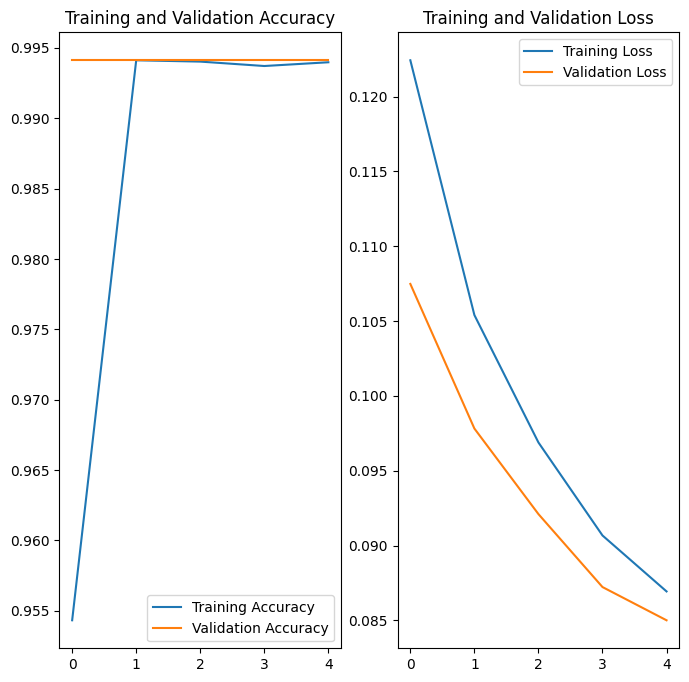

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [34]:
# test_x = test_df["comment_text"]
test_df["vector"] = test_df["comment_text"].apply(lambda x: preprocess(x))
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,vector
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0,"[-0.022064075, -0.016968763, -0.018042056, 0.0..."
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0,"[0.03476159, 0.024799943, 0.059744358, 0.03141..."
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0,"[0.03975314, 0.009037615, 0.0027374106, 0.0465..."
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0,"[-0.0138501525, -0.010836502, 0.007534697, 0.0..."
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0,"[-0.014439457, 0.012818056, -0.004410764, 0.03..."


In [35]:
len(test_df)

63978

In [40]:
test_df = test_df[~(test_df["vector"].apply(lambda x: (x==null_np).sum()==300))]
len(test_df)

63928

In [45]:
test_df["vector"].to_numpy()

array([array([-2.20640749e-02, -1.69687625e-02, -1.80420559e-02,  5.26679344e-02,
              -1.80269796e-02, -5.64268976e-03,  2.26485040e-02, -5.20094298e-02,
               4.19337042e-02, -1.11503853e-02, -3.55254374e-02, -1.62703451e-02,
              -1.13468198e-02,  3.12178880e-02, -3.44821475e-02,  5.89756258e-02,
               2.83041690e-02,  7.32491314e-02, -7.36569194e-03, -2.64879763e-02,
               5.32849431e-02,  8.41314439e-03,  2.94281896e-02,  9.26352746e-04,
               4.44330312e-02,  1.64953526e-02,  3.90167278e-03,  3.24580190e-03,
               1.19540943e-02, -2.31709681e-03, -2.94012446e-02, -1.66533049e-02,
              -3.42873894e-02,  6.38197958e-02,  3.70938368e-02,  1.67140421e-02,
               2.98279449e-02, -8.97784426e-04,  1.39931040e-02,  2.35155299e-02,
               2.91930120e-02,  4.93865972e-03,  2.79434826e-02,  5.63342823e-03,
              -4.35997397e-02, -2.72390693e-02, -1.66247915e-02, -1.66457035e-02,
              -3

In [46]:
test_x = np.stack(test_df['vector'].to_numpy())

In [49]:
test_x.shape

(63928, 300)

In [50]:
test_x = np.expand_dims(test_x, -1)

In [51]:
test_x.shape

(63928, 300, 1)

In [54]:
test_y = test_df[test_df.columns[2:8]].values

In [55]:
test_y.shape

(63928, 6)

In [56]:
test_tf = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_tf = test_tf.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

In [57]:
model.evaluate(test_tf)

2023-07-04 17:35:21.535141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [63928,6]
	 [[{{node Placeholder/_1}}]]
2023-07-04 17:35:21.535456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [63928,300,1]
	 [[{{node Placeholder/_0}}]]


1998/1998 [==============================] - 44s 22ms/step - loss: 0.0996 - accuracy: 0.9976


[0.09959534555673599, 0.9976066946983337]

In [ ]:
model = models.load_model('model.h5')

In [20]:
def predict_toxicity(text):
    array = preprocess(text)
    array = np.expand_dims(array, -1)
    return model.predict(np.expand_dims(array, 0))